# **Bike Rental Demand Prediction**

### **Objective:** 
- To predict the demand of bikes at any given hours of the day, so that, the bike rental company can plan accordingly and avoid any shortage or surplus of bikes.

### **Dataset:** 
- The dataset is provided by the Bike Rental company, where the dataset provides hourly rental data for last two years.

#### The flow of the case study is as below:

- Reading the data in python
- Defining the problem statement
- Identifying the Target variable
- Looking at the distribution of Target variable
- Basic Data exploration
- Rejecting useless columns
- Visual Exploratory Data Analysis for data distribution (Histogram and Barcharts)
- Feature Selection based on data distribution
- Outlier treatment
- Missing Values treatment
- Visual correlation analysis
- Statistical correlation analysis (Feature Selection)
- Converting data to numeric for ML
- Sampling and K-fold cross validation
- Trying multiple Regression algorithms
- Selecting the best Model
- Deploying the best model in production

### **Dataset:**
- The file contains data for **17,379** rental bikes.


### **The business meaning of each column in the data is as below**

- **season**: The current season (1:winter, 2:spring, 3:summer, 4:fall)
- **yr**: year (0: 2011, 1:2012)
- **mnth**: month ( 1 to 12)
- **hr**: hour of the day (0 to 23)
- **holiday**: weather day is holiday or not
- **weekday**: day of the week
- **workingday**: if day is neither weekend nor holiday is 1, otherwise is 0
- **weathersit**: The Weather forecast for the day
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- **temp**: Normalized temperature in Celsius.
- **atemp**: Normalized feeling temperature in Celsius.
- **hum**: Normalized humidity. The values are divided to 100 (max)
- **windspeed**: Normalized wind speed. The values are divided to 67 (max)
- **casual**: count of casual users
- **registered**: count of registered users
- **cnt**: count of total rental bikes including both casual and registered

In [1]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset
import pandas as pd
import numpy as np
BikeRentalData=pd.read_csv('../Datasets/BikeRentalData.csv', encoding='latin')
print('Shape before deleting duplicate values:', BikeRentalData.shape)

# Removing duplicate rows if any
BikeRentalData=BikeRentalData.drop_duplicates()
print('Shape After deleting duplicate values:', BikeRentalData.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
BikeRentalData.head(10)

Shape before deleting duplicate values: (17379, 14)
Shape After deleting duplicate values: (17377, 14)


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1,1
5,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,1,1
6,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,0,2
7,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,2,3
8,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,7,8
9,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,6,14


### **Defining the problem statement**:
To create a ML model which can predict the number of bikes which will be rented at a given hour of the day:
- **Target Variable**: cnt
- **Predictors**: holiday, weather, registered users etc.

### **Determining the type of Machine Learning**:
Based on the problem statement, we need to create a **supervised ML Regression model**, as the target variable is Continuous.


### **Observation from the distribution of Target Variable**:

- If the target variable's distribution is too skewed, then the predictive model will not be possible.
- Bell curve is desirable while slight positive or negative skewness is also fine.
- When performing Regression, making sure histograms looks like a bell curve or slightly skewed version of it is important.
    - Otherwise it impacts the Machine Learning Algorithms ability to learn all the scenarios.

In [3]:
BikeRentalData.nunique()

season          4
yr              2
mnth           12
hr             24
holiday         2
weekday         7
workingday      2
weathersit      4
temp           50
atemp          65
hum            89
windspeed      30
registered    776
cnt           869
dtype: int64

<Axes: >

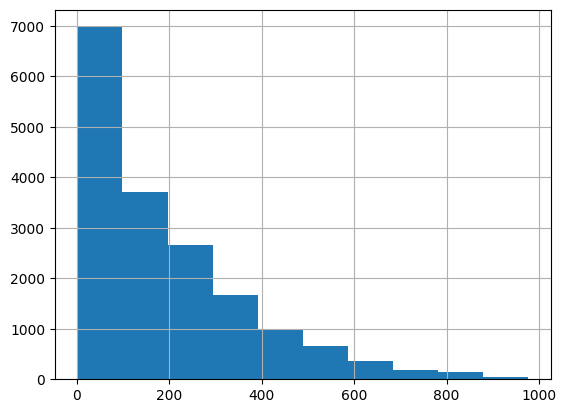

In [4]:
## Creating Bar Chart as the Target Variable is Continuous
%matplotlib inline
BikeRentalData['cnt'].hist()

The data distribution of the target variable is satisfactory to proceed further. There are sufficient number of rows for each type of values to learn from.

### **Basic Data Exploration**
- Step to:
    - Gauge the overall data
    - Volume of the data
    - Types of columns in the data

- Initial assessment of the data being done to identify which columns are Quantitative, Categorical or Qualitative.

- Checking how each column would affect the values of the Target Variable.
    - If the column affects the final answer then remove the column.

In [5]:
BikeRentalData.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1,1


- Observing the summarized information of the data
- Data types, Missing values based on the number of null values Vs total rows, etc.
- Remove those variables from data which have too many missing values (Missing Values > 30%)
- Remove Qualitative variables which cannot be used in Machine Learning

In [6]:
BikeRentalData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17377 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17377 non-null  int64  
 1   yr          17377 non-null  int64  
 2   mnth        17377 non-null  int64  
 3   hr          17377 non-null  int64  
 4   holiday     17377 non-null  int64  
 5   weekday     17377 non-null  int64  
 6   workingday  17377 non-null  int64  
 7   weathersit  17377 non-null  int64  
 8   temp        17377 non-null  float64
 9   atemp       17377 non-null  float64
 10  hum         17377 non-null  float64
 11  windspeed   17377 non-null  float64
 12  registered  17377 non-null  int64  
 13  cnt         17377 non-null  int64  
dtypes: float64(4), int64(10)
memory usage: 2.0 MB


In [7]:
# Looking at the descriptive statistics of the data
BikeRentalData.describe(include='all')

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt
count,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000
mean,2.501525,0.502561,6.537435,11.547505,0.028774,3.003568,0.682742,1.425332,0.496993,0.475780,0.627216,0.190108,153.803649,189.483916
std,1.106917,0.500008,3.438722,6.914438,0.167175,2.005744,0.465422,0.639377,0.192553,0.171849,0.192935,0.122343,151.357913,181.387645
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,886.000000,977.000000


- Finding unique values for each column
- To understand which column is **Categorical** and which column is **Continuous**
- If number of unique values,
    - < 20 -> Category
    - else continuous

In [8]:
BikeRentalData.nunique()

season          4
yr              2
mnth           12
hr             24
holiday         2
weekday         7
workingday      2
weathersit      4
temp           50
atemp          65
hum            89
windspeed      30
registered    776
cnt           869
dtype: int64

### **Basic Data Exploration Results**

- **season**: Categorical. Selected.
- **yr**: Qualitative. Rejected. The year value is like an ID just for reference.
- **mnth**: Categorical. Selected.
- **hr**: Categorical. Selected.
- **holiday**: Categorical. Selected.
- **weekday**: Categorical. Selected.
w- **orkingday**: Categorical. Selected.
- **weathersit**: Categorical. Selected.
- **temp**: Continuous. Selected.
- **atemp**: Continuous. Selected.
- **hum**: Continuous. Selected.
- **windspeed**: Continuous. Selected.
- **casual**: Continuous. Selected.
- **registered**: Continuous. Selected.
- **cnt**: Continuous. Selected.This is the **Target Variable**!

### **Removing useless columns from the data**

Deleting those columns which are not useful in predictive analysis because these variables are qualitative

In [9]:
UselessColumns=['yr']
BikeRentalData=BikeRentalData.drop(UselessColumns, axis=1)
BikeRentalData.head()

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,13,16
1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,32,40
2,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,27,32
3,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,10,13
4,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1,1


### **Visual Exploratory Data Analysis**
- Categorical variables: Bar plot
- Continuous variables: Histogram